<a href="https://colab.research.google.com/github/phaneo/Hands-on-ML/blob/main/Intro_to_ANN_with_Keras_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/phaneo/Hands-on-ML/blob/main/Intro_to_ANN_with_Keras_.ipynb)

# **Perceptrons**

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X= iris.data[:, (2, 3)]
y = (iris.target ==0).astype(int)

per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])


In [2]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.4.3'

In [3]:
keras.__version__

'2.4.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test/255.

(-0.5, 27.5, 27.5, -0.5)

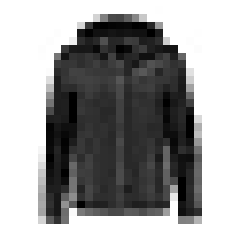

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='binary')
plt.axis("off")

In [7]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


2022-01-01 04:54:24.256101: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


We can also pass a list of layers when creating a Sequential model:

```
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28,28]),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
])
```



In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [11]:
model.compile(loss ="sparse_categorical_crossentropy",
            optimizer = keras.optimizers.SGD(learning_rate=0.03),
              metrics= ["accuracy"]
              )

In [12]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

2022-01-01 04:54:24.606544: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-01 04:54:24.613870: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499995000 Hz


Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7992 - accuracy: 0.7293 - val_loss: 0.4647 - val_accuracy: 0.8356
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4384 - accuracy: 0.8444 - val_loss: 0.3829 - val_accuracy: 0.8656
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3894 - accuracy: 0.8606 - val_loss: 0.3779 - val_accuracy: 0.8650
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3496 - accuracy: 0.8755 - val_loss: 0.3888 - val_accuracy: 0.8562
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3391 - accuracy: 0.8769 - val_loss: 0.3565 - val_accuracy: 0.8732
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3187 - accuracy: 0.8828 - val_loss: 0.3263 - val_accuracy: 0.8846
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3039 - accuracy: 0.8883 - val_loss: 0.3424 - val_accuracy:

(0.0, 1.0)

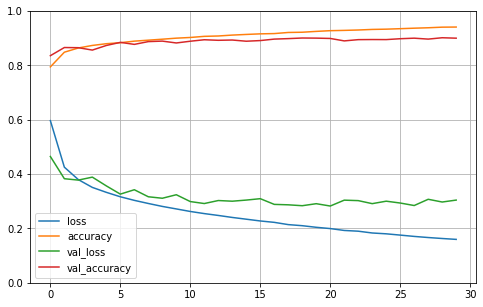

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3441 - accuracy: 0.8885


[0.34407684206962585, 0.8884999752044678]

In [15]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [16]:
y_pred = np.argmax(model.predict(X_new), axis = 1)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [17]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [19]:
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation="relu", input_shape= X_train.shape[1:]),
                                 keras.layers.Dense(1)
])
model.compile(loss = "mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.7690 - val_loss: 0.5411
Epoch 2/20
363/363 [==============================] - 0s 853us/step - loss: 0.5448 - val_loss: 0.4809
Epoch 3/20
363/363 [==============================] - 0s 869us/step - loss: 0.4914 - val_loss: 0.4578
Epoch 4/20
363/363 [==============================] - 0s 854us/step - loss: 0.4705 - val_loss: 0.4561
Epoch 5/20
363/363 [==============================] - 0s 858us/step - loss: 0.4715 - val_loss: 0.4394
Epoch 6/20
363/363 [==============================] - 0s 851us/step - loss: 0.4467 - val_loss: 0.4304
Epoch 7/20
363/363 [==============================] - 0s 859us/step - loss: 0.4737 - val_loss: 0.4255
Epoch 8/20
363/363 [==============================] - 0s 874us/step - loss: 0.4545 - val_loss: 0.4228
Epoch 9/20
363/363 [==============================] - 0s 865us/step - loss: 0.4292 - val_loss: 0.4184
Epoch 10/20
363/363 [==============================] - 0s 868us/step - loss: 0.4248 

(0.0, 1.0)

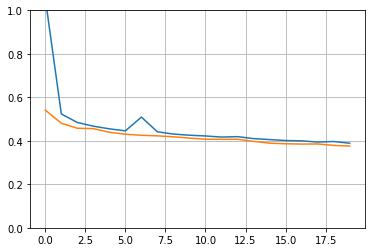

In [20]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)

## Callbacks

Callbacks can be used as argument to fit() method to specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing a batch.

We can also set save_best_only=True when creating ModelCheckpoint if using a validation set, so that it will save the model only when its performance on the validation set is the best so far. This way we don't need to worry about training for too long and overfitting the training set; simply restore the last model saved after training, and this will be the best model on the validation set.

The following is a simple way to implement early stopping:

In [21]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                               save_best_only=True)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")

Epoch 1/30
363/363 [==============================] - 0s 950us/step - loss: 0.3925 - val_loss: 0.3719
Epoch 2/30
363/363 [==============================] - 0s 888us/step - loss: 0.3923 - val_loss: 0.3761
Epoch 3/30
363/363 [==============================] - 0s 925us/step - loss: 0.3852 - val_loss: 0.3757
Epoch 4/30
363/363 [==============================] - 0s 868us/step - loss: 0.3956 - val_loss: 0.3830
Epoch 5/30
363/363 [==============================] - 0s 867us/step - loss: 0.3869 - val_loss: 0.3736
Epoch 6/30
363/363 [==============================] - 0s 866us/step - loss: 0.3813 - val_loss: 0.3687
Epoch 7/30
363/363 [==============================] - 0s 868us/step - loss: 0.3882 - val_loss: 0.3631
Epoch 8/30
363/363 [==============================] - 0s 860us/step - loss: 0.3782 - val_loss: 0.3696
Epoch 9/30
363/363 [==============================] - 0s 882us/step - loss: 0.3788 - val_loss: 0.3629
Epoch 10/30
363/363 [==============================] - 0s 876us/step - loss: 0.479

Another way to implement early stopping is to use the EarlyStopping callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by *patience* argument), and it will optionally roll back to the best model.

We can implement both callbacks to save checkpoints of the model and interrupt training early when there is no more progress (to avoid wasting time and resources).

In [22]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, 
                                                 restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3555 - val_loss: 0.3568
Epoch 2/100
363/363 [==============================] - 0s 858us/step - loss: 0.3672 - val_loss: 0.3697
Epoch 3/100
363/363 [==============================] - 0s 858us/step - loss: 0.3529 - val_loss: 0.3490
Epoch 4/100
363/363 [==============================] - 0s 864us/step - loss: 0.3532 - val_loss: 0.3512
Epoch 5/100
363/363 [==============================] - 0s 873us/step - loss: 0.3545 - val_loss: 0.3541
Epoch 6/100
363/363 [==============================] - 0s 860us/step - loss: 0.3545 - val_loss: 0.3468
Epoch 7/100
363/363 [==============================] - 0s 864us/step - loss: 0.3500 - val_loss: 0.3431
Epoch 8/100
363/363 [==============================] - 0s 864us/step - loss: 0.3624 - val_loss: 0.3449
Epoch 9/100
363/363 [==============================] - 0s 856us/step - loss: 0.3508 - val_loss: 0.3528
Epoch 10/100
363/363 [==============================] - 0s 864us/step - los

We can also write custom callbacks if we need more control.

The following custom callback will display the ratio between validation loss and training loss during training, (e.g. to detect overfitting).

In [23]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

Callbacks can be used during evaluation and predictions for debugging.

* For evaluation, we should implement on_test_begin(), on_test_end(), on_test_batch_begin(), on_test_batch_end() (called by evaluate()).
* For prediction, we should implement on_predict_begin(), on_predict_end(), on_predict_batch_begin(), on_predict_batch_end() (called by predict()).

## Tensorboard

Tensorboard can be used for visualization to view learning curves during training, view learning curves between multiple runs, visualize computational graphs, analyse training statistics, view images generated by the model, visualize complex multidimensional data projected down to 3D, etc.

To use it, the program must be modified to output the data we want to visualize to binary log files called *event files*. Each binary record is called a *summary*.
The Tensorboard server will monitor the log directory, and will automatically pick up changes and update the visualizations, which allows us to visualize live data.
In general, you want to point the Tensorboard server to a root log directory and configure the program so that it writes to a different subdirectory every time it runs. This will help to compare multiple runs without mixing things up.

In [24]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [25]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Epoch 1/30
197/363 [===============>..............] - ETA: 0s - loss: 0.3250

2022-01-01 04:56:28.061145: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-01-01 04:56:28.061175: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-01-01 04:56:28.061216: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-01-01 04:56:28.103498: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-01-01 04:56:28.103535: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-01-01 04:56:28.106011: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-01-01 04:56:28.111608: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-01-01 04:56:28.118243: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./my_logs/run_2022_01_01-04_56_28/train/plugins/profile/2022_01_01_04_56_28
2022-01-01 04:56:28.118750

363/363 [==============================] - 0s 1ms/step - loss: 0.3333 - val_loss: 0.3310
Epoch 2/30
363/363 [==============================] - 0s 878us/step - loss: 0.3339 - val_loss: 0.3238
Epoch 3/30
363/363 [==============================] - 0s 884us/step - loss: 0.3335 - val_loss: 0.3412
Epoch 4/30
363/363 [==============================] - 0s 855us/step - loss: 0.3346 - val_loss: 0.3247
Epoch 5/30
363/363 [==============================] - 0s 872us/step - loss: 0.3351 - val_loss: 0.3469
Epoch 6/30
363/363 [==============================] - 0s 854us/step - loss: 0.3472 - val_loss: 0.3281
Epoch 7/30
363/363 [==============================] - 0s 866us/step - loss: 0.3328 - val_loss: 0.3233
Epoch 8/30
363/363 [==============================] - 0s 874us/step - loss: 0.3319 - val_loss: 0.3351
Epoch 9/30
363/363 [==============================] - 0s 860us/step - loss: 0.3315 - val_loss: 0.3277
Epoch 10/30
363/363 [==============================] - 0s 861us/step - loss: 0.3310 - val_loss:

In [26]:
%load_ext tensorboard

In [27]:
%tensorboard --logdir=./my_logs --port=6006 --bind_all

## Fine tuning NN hyperparameters

We can use GridSearchCV or RandomizedSearchCV to find the best possible combinations of hyperparameters.

To do this, the first step is to create a function that will build and compile a keras model, given a set of hyperparameters:

In [28]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [29]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [30]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data = (X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 2.3716 - val_loss: 0.6760
Epoch 2/100
363/363 [==============================] - 0s 879us/step - loss: 0.6969 - val_loss: 0.5837
Epoch 3/100
363/363 [==============================] - 0s 881us/step - loss: 0.5979 - val_loss: 0.5414
Epoch 4/100
363/363 [==============================] - 0s 866us/step - loss: 0.5364 - val_loss: 0.5116
Epoch 5/100
363/363 [==============================] - 0s 878us/step - loss: 0.5230 - val_loss: 0.4935
Epoch 6/100
363/363 [==============================] - 0s 875us/step - loss: 0.5034 - val_loss: 0.4757
Epoch 7/100
363/363 [==============================] - 0s 875us/step - loss: 0.4837 - val_loss: 0.4664
Epoch 8/100
363/363 [==============================] - 0s 864us/step - loss: 0.4732 - val_loss: 0.4606
Epoch 9/100
363/363 [==============================] - 0s 869us/step - loss: 0.4583 - val_loss: 0.4519
Epoch 10/100
363/363 [==============================] - 0s 866us/step - los

In general, increasing the no. of layers instead of no. of neurons is more efficient.

It's often simpler and more efficient to pick a model with more layers & neurons than required and use earlystopping and other regularization techniques to prevent overfitting.

### Learning rate

Learning rate is the most important hyperparameter.

One way to find a good learning rate is to train the model for a few hundred iterations, starting with a very low rate (ex. 10^-5) and gradually increasing to a very large value (ex. 10). This is done by multiplying the learning rate by a constant factor at each iteration (ex. by exp(log(10^6)/500) to go from 10^-5 to 10 in 500 iterations).

We can then reinitialize the model and train it normally using this good learning rate.

The optimal learning rate depends on other hyperparameters such as batch size. So if we modify any hyperparameter, we have to ensure that we update learning rate as well.